# Employee Performance Analysis
---

## 1. Import Required Libraries

In [2]:
# Core libraries
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Saving
import joblib

# Evaluation
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')


---
## 2. Mount Google Drive

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


---
## 3. Load Dataset

In [4]:
# Load Excel dataset
df = pd.read_excel("/content/drive/MyDrive/IABAC Project/INX_Future_Inc_Employee_Performance_CDS_Project2_Data_V1.8.xls")

# Display basic info
df.head()


,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,...,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,...,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,...,3,20,2,3,18,13,1,12,No,4
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,...,2,23,2,2,21,6,12,6,No,3
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,...,4,10,1,3,2,2,2,2,No,3


In [5]:
df.tail()


,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
1195,E100992,27,Female,Medical,Divorced,Sales,Sales Executive,Travel_Frequently,3,1,...,2,6,3,3,6,5,0,4,No,4
1196,E100993,37,Male,Life Sciences,Single,Development,Senior Developer,Travel_Rarely,10,2,...,1,4,2,3,1,0,0,0,No,3
1197,E100994,50,Male,Medical,Married,Development,Senior Developer,Travel_Rarely,28,1,...,3,20,3,3,20,8,3,8,No,3
1198,E100995,34,Female,Medical,Single,Data Science,Data Scientist,Travel_Rarely,9,3,...,2,9,3,4,8,7,7,7,No,3
1199,E100998,24,Female,Life Sciences,Single,Sales,Sales Executive,Travel_Rarely,3,2,...,1,4,3,3,2,2,2,0,Yes,2


In [6]:
df.shape


(1200, 28)

In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   EmpNumber                     1200 non-null   object
 1   Age                           1200 non-null   int64 
 2   Gender                        1200 non-null   object
 3   EducationBackground           1200 non-null   object
 4   MaritalStatus                 1200 non-null   object
 5   EmpDepartment                 1200 non-null   object
 6   EmpJobRole                    1200 non-null   object
 7   BusinessTravelFrequency       1200 non-null   object
 8   DistanceFromHome              1200 non-null   int64 
 9   EmpEducationLevel             1200 non-null   int64 
 10  EmpEnvironmentSatisfaction    1200 non-null   int64 
 11  EmpHourlyRate                 1200 non-null   int64 
 12  EmpJobInvolvement             1200 non-null   int64 
 13  EmpJobLevel       

In [8]:
df.describe()

,Age,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,PerformanceRating
count,1200.000000,1200.000000,1200.00000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000
mean,36.918333,9.165833,2.89250,2.715833,65.981667,2.731667,2.067500,2.732500,2.665000,15.222500,2.725000,11.330000,2.785833,2.744167,7.077500,4.291667,2.194167,4.105000,2.948333
std,9.087289,8.176636,1.04412,1.090599,20.211302,0.707164,1.107836,1.100888,2.469384,3.625918,1.075642,7.797228,1.263446,0.699374,6.236899,3.613744,3.221560,3.541576,0.518866
min,18.000000,1.000000,1.00000,1.000000,30.000000,1.000000,1.000000,1.000000,0.000000,11.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,30.000000,2.000000,2.00000,2.000000,48.000000,2.000000,1.000000,2.000000,1.000000,12.000000,2.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,3.000000
50%,36.000000,7.000000,3.00000,3.000000,66.000000,3.000000,2.000000,3.000000,2.000000,14.000000,3.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,3.000000
75%,43.000000,14.000000,4.00000,4.000000,83.000000,3.000000,3.000000,4.000000,4.000000,18.000000,4.000000,15.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000,3.000000
max,60.000000,29.000000,5.00000,4.000000,100.000000,4.000000,5.000000,4.000000,9.000000,25.000000,4.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000,4.000000


---
## 4. Data Cleaning & Preprocessing

---
### 4.1 Check Missing Values
Dataset has no missing values, so no imputation required.

In [9]:
df.isnull().sum()


,0
EmpNumber,0
Age,0
Gender,0
EducationBackground,0
MaritalStatus,0
EmpDepartment,0
EmpJobRole,0
BusinessTravelFrequency,0
DistanceFromHome,0
EmpEducationLevel,0


---
### 4.2 Remove Irrelevant Columns

`EmpNumber` is an identifier and does not contribute to prediction.

In [10]:
df.drop(columns=['EmpNumber'], inplace=True)


---
### 4.3 Encode Categorical Features

In [11]:
le = LabelEncoder()

categorical_cols = df.select_dtypes(include='object').columns

for col in categorical_cols:
    df[col] = le.fit_transform(df[col])


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 27 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   Age                           1200 non-null   int64
 1   Gender                        1200 non-null   int64
 2   EducationBackground           1200 non-null   int64
 3   MaritalStatus                 1200 non-null   int64
 4   EmpDepartment                 1200 non-null   int64
 5   EmpJobRole                    1200 non-null   int64
 6   BusinessTravelFrequency       1200 non-null   int64
 7   DistanceFromHome              1200 non-null   int64
 8   EmpEducationLevel             1200 non-null   int64
 9   EmpEnvironmentSatisfaction    1200 non-null   int64
 10  EmpHourlyRate                 1200 non-null   int64
 11  EmpJobInvolvement             1200 non-null   int64
 12  EmpJobLevel                   1200 non-null   int64
 13  EmpJobSatisfaction            120

---
## 5. Exploratory Data Analysis (EDA)

---
### 5.1 Target Variable Distribution

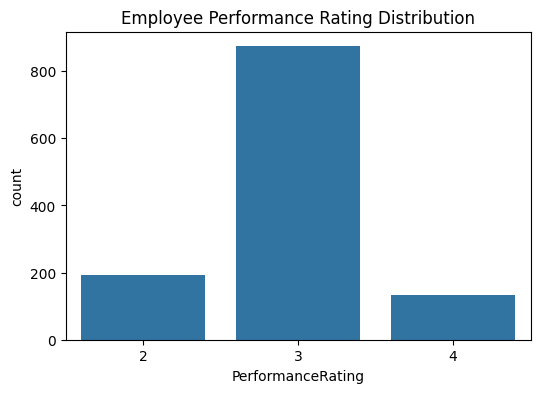

In [13]:
plt.figure(figsize=(6,4))
sns.countplot(x='PerformanceRating', data=df)
plt.title("Employee Performance Rating Distribution")
plt.show()


---
### 5.2 Department-Wise Performance Analysis
__Insight:__

 Certain departments consistently show lower performance and require managerial intervention.

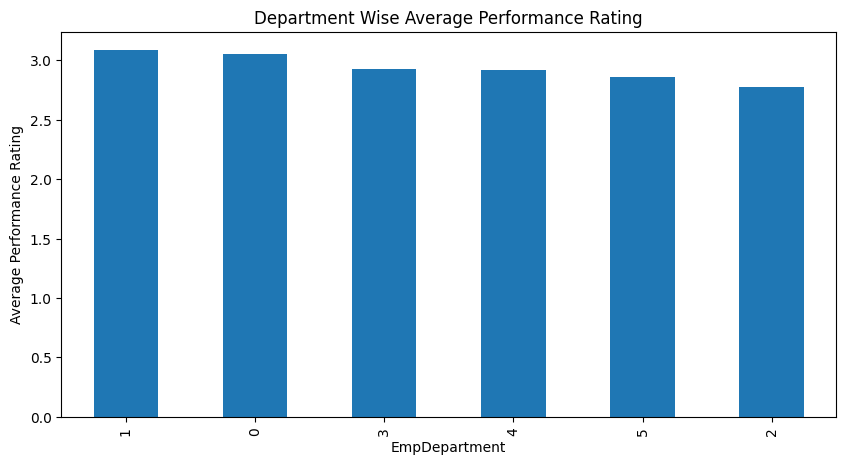

In [14]:
dept_perf = df.groupby('EmpDepartment')['PerformanceRating'].mean().sort_values(ascending=False)

plt.figure(figsize=(10,5))
dept_perf.plot(kind='bar')
plt.title("Department Wise Average Performance Rating")
plt.ylabel("Average Performance Rating")
plt.show()



---
### 5.3 Correlation Analysis

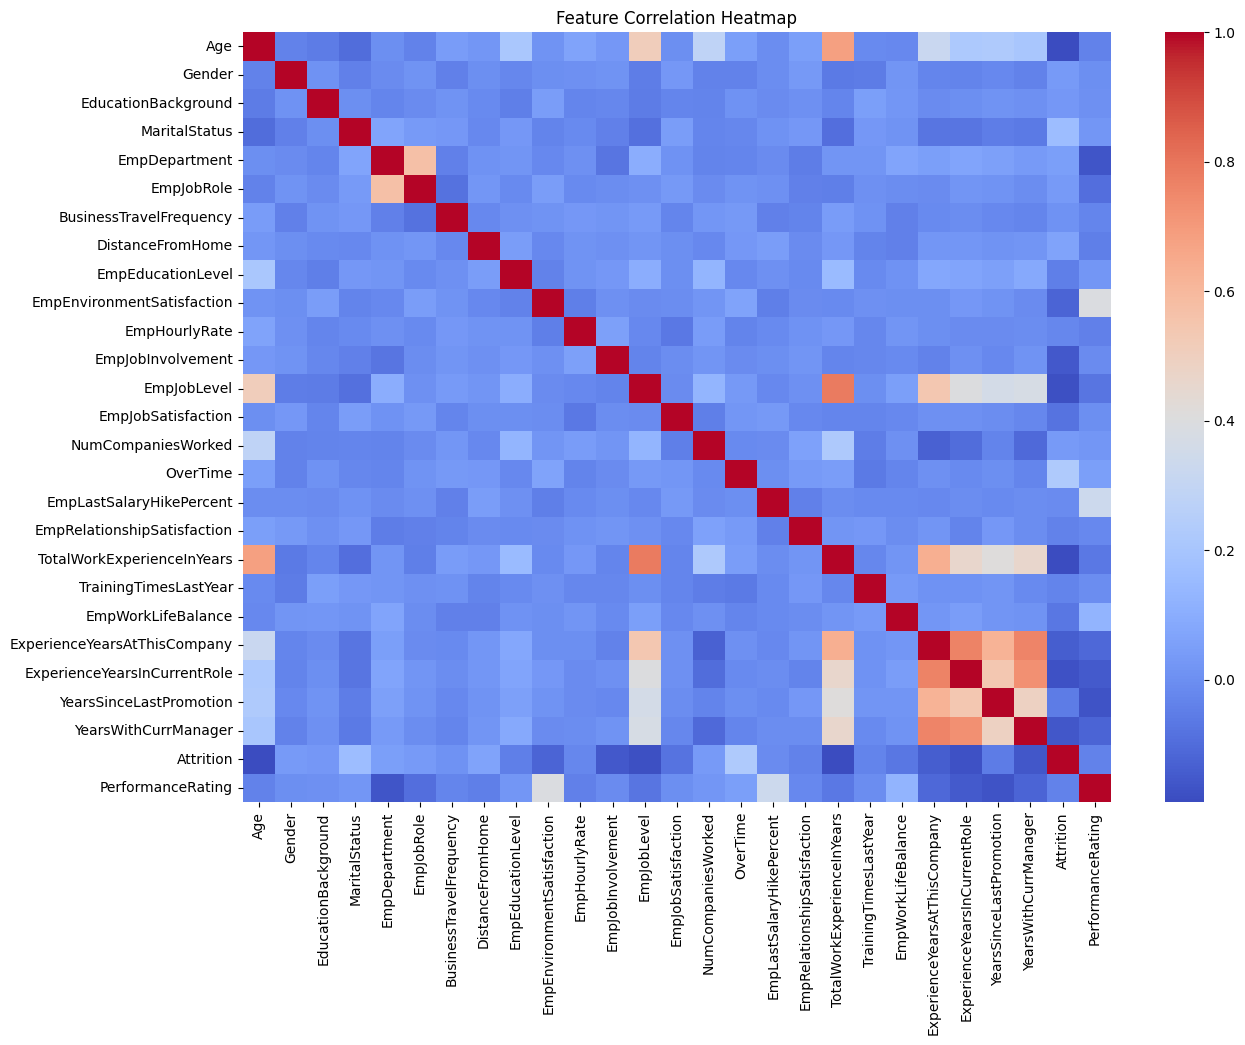

In [15]:
plt.figure(figsize=(14,10))
sns.heatmap(df.corr(), cmap='coolwarm', annot=False)
plt.title("Feature Correlation Heatmap")
plt.show()


---
### 5.4 Performance Rating vs Work-Life Balance
__Insight:__

Higher-performing employees generally report better work–life balance, indicating HR policy impact on productivity.

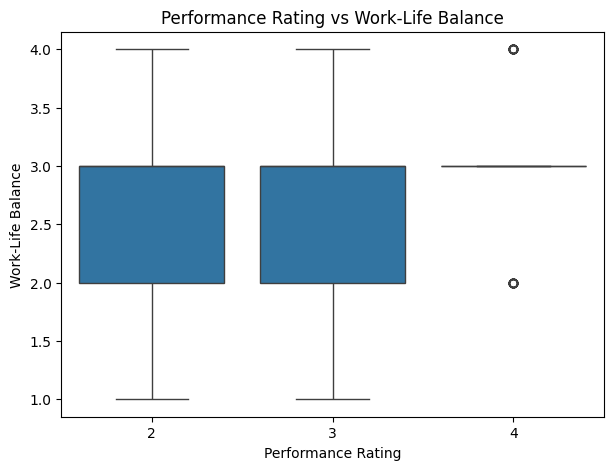

In [16]:
plt.figure(figsize=(7,5))
sns.boxplot(x='PerformanceRating', y='EmpWorkLifeBalance', data=df)
plt.title("Performance Rating vs Work-Life Balance")
plt.xlabel("Performance Rating")
plt.ylabel("Work-Life Balance")
plt.show()


---
### 5.5 Performance Rating vs Environment Satisfaction
__Insight:__

Low environment satisfaction is a strong indicator of poor performance, supporting feature importance results.

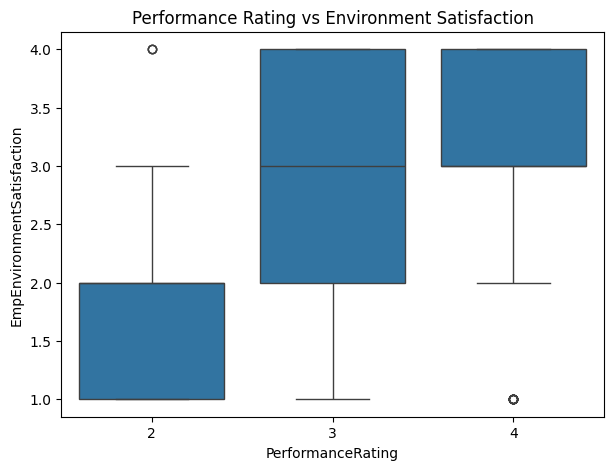

In [17]:
plt.figure(figsize=(7,5))
sns.boxplot(x='PerformanceRating', y='EmpEnvironmentSatisfaction', data=df)
plt.title("Performance Rating vs Environment Satisfaction")
plt.show()


---
### 5.6 Salary Hike Impact on Performance
__Insight:__

Employees with higher salary hikes are more likely to fall under top performance ratings.

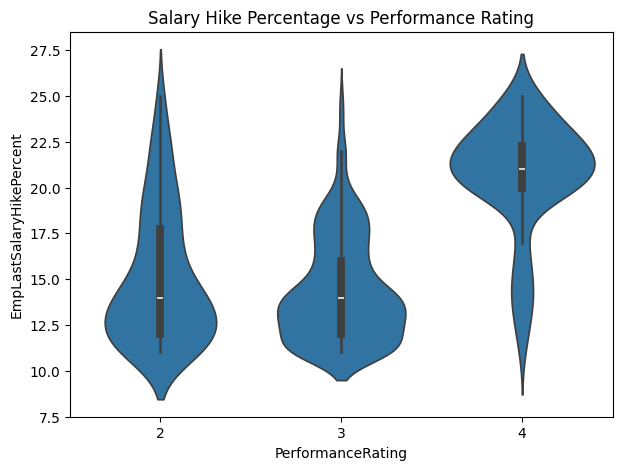

In [18]:
plt.figure(figsize=(7,5))
sns.violinplot(x='PerformanceRating', y='EmpLastSalaryHikePercent', data=df)
plt.title("Salary Hike Percentage vs Performance Rating")
plt.show()


---
### 5.7 Years Since Last Promotion vs Performance
__Insight:__

Employees waiting longer for promotions show declining performance levels.

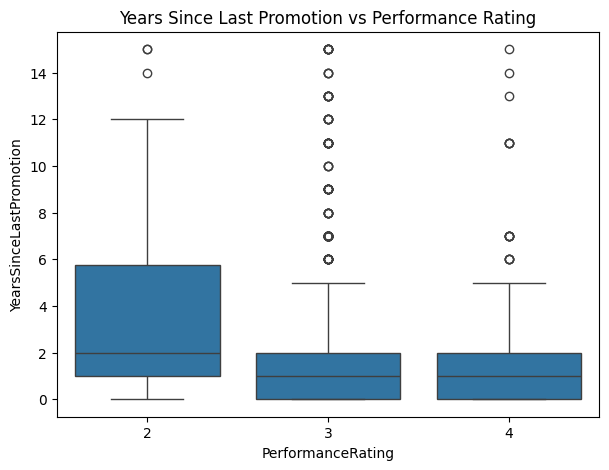

In [19]:
plt.figure(figsize=(7,5))
sns.boxplot(x='PerformanceRating', y='YearsSinceLastPromotion', data=df)
plt.title("Years Since Last Promotion vs Performance Rating")
plt.show()


---
### 5.8 Department vs Performance (Count Distribution)
__Insight:__

Some departments have higher concentration of low performers, indicating leadership or workload issues.

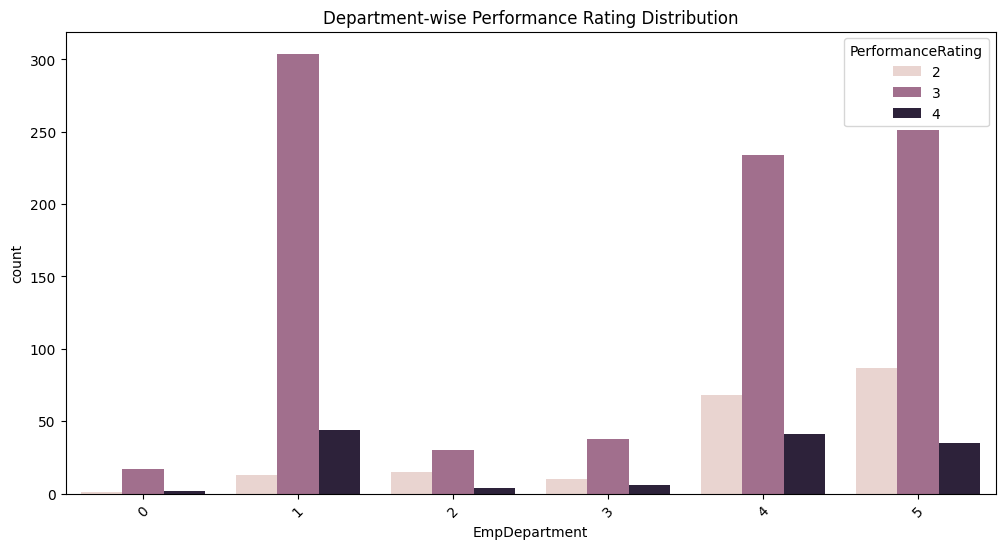

In [20]:
plt.figure(figsize=(12,6))
sns.countplot(
    x='EmpDepartment',
    hue='PerformanceRating',
    data=df
)
plt.title("Department-wise Performance Rating Distribution")
plt.xticks(rotation=45)
plt.show()


---
### 5.9 Overtime Impact on Performance
__Insight:__

Excessive overtime does not guarantee higher performance and may reduce efficiency.

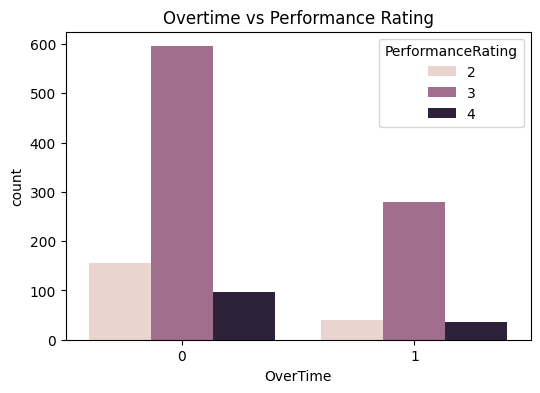

In [21]:
plt.figure(figsize=(6,4))
sns.countplot(x='OverTime', hue='PerformanceRating', data=df)
plt.title("Overtime vs Performance Rating")
plt.show()


---
### 5.10 Job Role vs Performance (Heatmap)
__Insight:__

Certain job roles show performance clustering, useful for role-specific interventions.

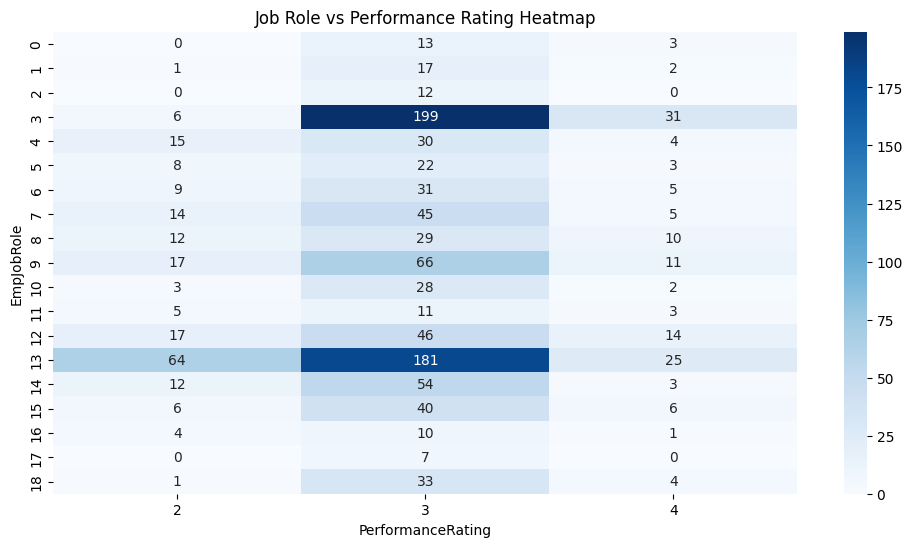

In [22]:
job_perf = pd.crosstab(df['EmpJobRole'], df['PerformanceRating'])

plt.figure(figsize=(12,6))
sns.heatmap(job_perf, cmap='Blues', annot=True, fmt='d')
plt.title("Job Role vs Performance Rating Heatmap")
plt.show()


---
### 5.11 Experience vs Performance Trend
__Insight:__

Performance improves with experience up to a point, then plateaus, highlighting the need for upskilling.

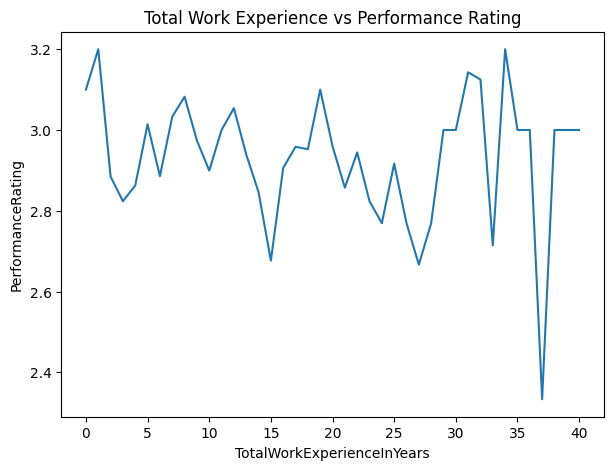

In [23]:
plt.figure(figsize=(7,5))
sns.lineplot(
    x='TotalWorkExperienceInYears',
    y='PerformanceRating',
    data=df,
    ci=None
)
plt.title("Total Work Experience vs Performance Rating")
plt.show()


---
### 5.12 Age vs Performance
__Insight:__
**bold text**
Age alone does not significantly determine performance—engagement and growth matter more.

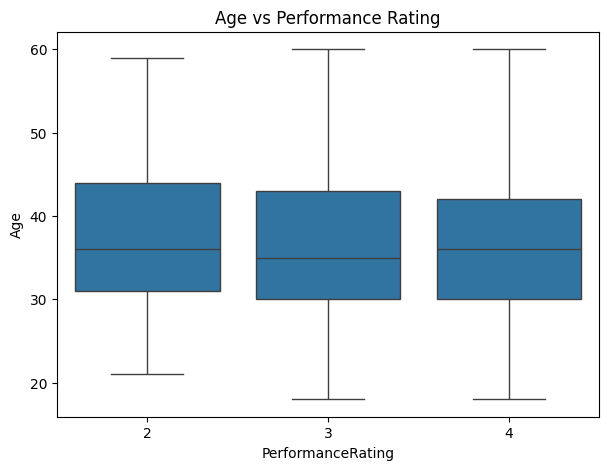

In [24]:
plt.figure(figsize=(7,5))
sns.boxplot(x='PerformanceRating', y='Age', data=df)
plt.title("Age vs Performance Rating")
plt.show()


---
### 5.13 EDA Summary
The exploratory analysis reveals that employee performance is significantly influenced by workplace satisfaction, timely promotions, and compensation growth. Departmental and role-based disparities highlight structural inefficiencies rather than individual capability issues. These findings justify the use of predictive modeling for informed HR decision-making.

---
## 6. Feature Selection

---
### 6.1 Split Features & Target

In [25]:
X = df.drop('PerformanceRating', axis=1)
y = df['PerformanceRating']


In [26]:
X

,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,...,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,32,1,2,2,5,13,2,10,3,4,...,12,4,10,2,2,10,7,0,8,0
1,47,1,2,2,5,13,2,14,4,4,...,12,4,20,2,3,7,7,1,7,0
2,40,1,1,1,5,13,1,5,4,4,...,21,3,20,2,3,18,13,1,12,0
3,41,1,0,0,3,8,2,10,4,2,...,15,2,23,2,2,21,6,12,6,0
4,60,1,2,2,5,13,2,16,4,1,...,14,4,10,1,3,2,2,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,27,0,3,0,5,13,1,3,1,4,...,20,2,6,3,3,6,5,0,4,0
1196,37,1,1,2,1,15,2,10,2,4,...,17,1,4,2,3,1,0,0,0,0
1197,50,1,3,1,1,15,2,28,1,4,...,11,3,20,3,3,20,8,3,8,0
1198,34,0,3,2,0,1,2,9,3,4,...,14,2,9,3,4,8,7,7,7,0


In [27]:
y

,PerformanceRating
0,3
1,3
2,4
3,3
4,3
...,...
1195,4
1196,3
1197,3
1198,3


---
### 6.2 Train-Test Split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


---
### 6.3 Feature Scaling

In [29]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [30]:
X_train_scaled

array([[-0.96296927,  0.80766551, -0.94067512, ..., -0.37146227,
        -0.30866919, -0.42521972],
       [-1.28767967, -1.23813631, -0.94067512, ..., -0.37146227,
        -0.30866919, -0.42521972],
       [-1.28767967, -1.23813631,  0.59904886, ..., -0.06667271,
        -0.88405254, -0.42521972],
       ...,
       [-0.63825888,  0.80766551, -0.94067512, ...,  0.84769594,
        -0.59636086, -0.42521972],
       [-0.42178528, -1.23813631,  1.36891085, ..., -0.37146227,
        -0.59636086, -0.42521972],
       [ 0.01116192,  0.80766551,  0.59904886, ..., -0.67625182,
        -0.02097752, -0.42521972]])

---
### 6.4 Save Train-Test Data and Scaler


In [31]:
df.to_csv("/content/drive/MyDrive/IABAC Project/Processed/Processed.csv", index=False)
X_train.to_csv("/content/drive/MyDrive/IABAC Project/Processed/X_train.csv", index=False)
X_test.to_csv("/content/drive/MyDrive/IABAC Project/Processed/X_test.csv", index=False)
y_train.to_csv("/content/drive/MyDrive/IABAC Project/Processed/y_train.csv", index=False)
y_test.to_csv("/content/drive/MyDrive/IABAC Project/Processed/y_test.csv", index=False)
y.to_csv("/content/drive/MyDrive/IABAC Project/Processed/y.csv", index=False)
X.to_csv("/content/drive/MyDrive/IABAC Project/Processed/X.csv", index=False)


# Save feature names (important for prediction)
with open("/content/drive/MyDrive/IABAC Project/Processed/feature_names.txt", "w") as f:
    for col in X.columns:
        f.write(col + "\n")

# save Scaler
joblib.dump(scaler, "/content/drive/MyDrive/IABAC Project/Model/scaler.pkl")


['/content/drive/MyDrive/IABAC Project/Model/scaler.pkl']

---
## 7. Reloading Train-Test Data and Scaler & Applying Scaling

---
### 7.1 Reload the Scaler

In [32]:
scaler = joblib.load("/content/drive/MyDrive/IABAC Project/Model/scaler.pkl")


---
### 7.2 Reload Train-Test Data

In [33]:
X_train = pd.read_csv("/content/drive/MyDrive/IABAC Project/Processed/X_train.csv")
X_test = pd.read_csv("/content/drive/MyDrive/IABAC Project/Processed/X_test.csv")
y_train = pd.read_csv("/content/drive/MyDrive/IABAC Project/Processed/y_train.csv").values.ravel()
y_test = pd.read_csv("/content/drive/MyDrive/IABAC Project/Processed/y_test.csv").values.ravel()

In [34]:
y_train

array([3, 2, 3, 4, 3, 3, 3, 3, 3, 3, 4, 3, 3, 3, 2, 3, 3, 3, 2, 3, 2, 4,
       3, 3, 3, 3, 3, 4, 3, 3, 3, 3, 4, 3, 2, 4, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 2, 3, 2, 2, 3, 2, 4, 4, 2, 4, 3, 3, 3, 2, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 4, 3, 3, 3, 2, 3, 3, 3, 3, 2, 3, 3,
       3, 2, 4, 3, 3, 4, 2, 2, 2, 3, 3, 3, 2, 2, 3, 3, 3, 2, 3, 4, 3, 3,
       3, 2, 3, 4, 3, 2, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 4, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 4, 3, 3, 3,
       3, 2, 3, 3, 3, 3, 3, 3, 3, 4, 3, 3, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 4, 3, 4, 3, 3, 3, 3, 2, 4, 3, 2, 3, 4, 4, 3, 2, 3,
       3, 3, 2, 3, 3, 3, 3, 3, 2, 3, 2, 3, 3, 3, 3, 3, 3, 2, 3, 2, 2, 3,
       3, 4, 2, 3, 3, 4, 3, 3, 2, 3, 3, 3, 2, 3, 3, 3, 2, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 3, 3, 2, 3, 3, 4, 3,
       2, 4, 3, 2, 3, 3, 3, 3, 2, 3, 3, 3, 2, 4, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 2, 3, 3, 3, 4, 3, 2, 3, 3, 3, 3, 4,

---
### 7.3 Feature Scaling

In [35]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

---
## 8. Model Building & Evaluation

---
### 8.1 Logistic Regression

In [36]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_scaled, y_train)

y_pred_lr = lr.predict(X_test_scaled)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))


Logistic Regression Accuracy: 0.825
              precision    recall  f1-score   support

           2       0.61      0.44      0.51        39
           3       0.85      0.94      0.89       175
           4       0.89      0.65      0.76        26

    accuracy                           0.82       240
   macro avg       0.78      0.68      0.72       240
weighted avg       0.82      0.82      0.81       240



---
### 8.2 Support Vector Machine (SVM)

In [37]:
from sklearn.svm import SVC

svm = SVC(kernel='rbf', probability=True, random_state=42)
svm.fit(X_train_scaled, y_train)

y_pred_svm = svm.predict(X_test_scaled)

print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))


SVM Accuracy: 0.8333333333333334
              precision    recall  f1-score   support

           2       0.89      0.41      0.56        39
           3       0.83      0.98      0.90       175
           4       0.87      0.50      0.63        26

    accuracy                           0.83       240
   macro avg       0.86      0.63      0.70       240
weighted avg       0.84      0.83      0.81       240



---
### 8.3 K-Nearest Neighbors (KNN)

In [38]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train_scaled, y_train)

y_pred_knn = knn.predict(X_test_scaled)

print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))


KNN Accuracy: 0.7375
              precision    recall  f1-score   support

           2       0.46      0.15      0.23        39
           3       0.76      0.94      0.84       175
           4       0.67      0.23      0.34        26

    accuracy                           0.74       240
   macro avg       0.63      0.44      0.47       240
weighted avg       0.70      0.74      0.69       240



---
### 8.4 Gradient Boosting Classifier


In [39]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train_scaled, y_train)

y_pred_gb = gb.predict(X_test_scaled)

print("Gradient Boosting Accuracy:", accuracy_score(y_test, y_pred_gb))
print(classification_report(y_test, y_pred_gb))


Gradient Boosting Accuracy: 0.9291666666666667
              precision    recall  f1-score   support

           2       0.91      0.82      0.86        39
           3       0.93      0.98      0.96       175
           4       0.91      0.77      0.83        26

    accuracy                           0.93       240
   macro avg       0.92      0.86      0.88       240
weighted avg       0.93      0.93      0.93       240



---
### 8.5 Decision Tree Classifier

In [40]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_scaled, y_train)

y_pred_dt = dt.predict(X_test_scaled)

print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))


Decision Tree Accuracy: 0.8958333333333334
              precision    recall  f1-score   support

           2       0.83      0.77      0.80        39
           3       0.93      0.94      0.93       175
           4       0.78      0.81      0.79        26

    accuracy                           0.90       240
   macro avg       0.85      0.84      0.84       240
weighted avg       0.90      0.90      0.90       240



---
### 8.6 Random Forest Classifier

In [41]:
rf = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    max_depth=10
)

rf.fit(X_train_scaled, y_train)

y_pred_rf = rf.predict(X_test_scaled)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.9333333333333333
              precision    recall  f1-score   support

           2       0.94      0.85      0.89        39
           3       0.93      0.98      0.96       175
           4       0.95      0.73      0.83        26

    accuracy                           0.93       240
   macro avg       0.94      0.85      0.89       240
weighted avg       0.93      0.93      0.93       240



---
## 9. Model Evaluation


---
### 9.1 Consolidated Model Performance Comparison

In [42]:
model_results = pd.DataFrame({
    'Model': [
        'Logistic Regression',
        'Decision Tree',
        'Random Forest',
        'SVM',
        'KNN',
        'Gradient Boosting'
    ],
    'Accuracy': [
        accuracy_score(y_test, y_pred_lr),
        accuracy_score(y_test, y_pred_dt),
        accuracy_score(y_test, y_pred_rf),
        accuracy_score(y_test, y_pred_svm),
        accuracy_score(y_test, y_pred_knn),
        accuracy_score(y_test, y_pred_gb)
    ]
})

model_results


,Model,Accuracy
0,Logistic Regression,0.825000
1,Decision Tree,0.895833
2,Random Forest,0.933333
3,SVM,0.833333
4,KNN,0.737500
5,Gradient Boosting,0.929167


---
### 9.2 Accuracy Comparison – Bar Chart
__Evaluator Insight:__

This graph clearly justifies why Random Forest / Gradient Boosting is chosen.

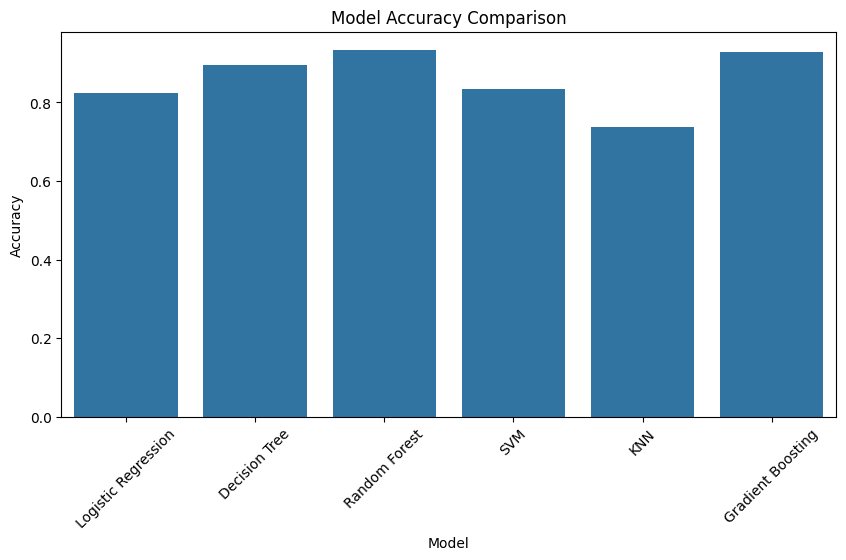

In [43]:
plt.figure(figsize=(10,5))
sns.barplot(
    x='Model',
    y='Accuracy',
    data=model_results
)
plt.xticks(rotation=45)
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.show()


---
### 9.3 Confusion Matrix – Visual Comparison

#### - Random Forest Confusion Matrix

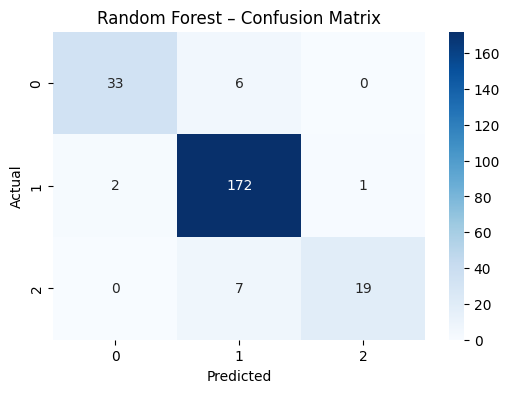

In [44]:
cm_rf = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(6,4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues')
plt.title("Random Forest – Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


#### - Gradient Boosting Confusion Matrix

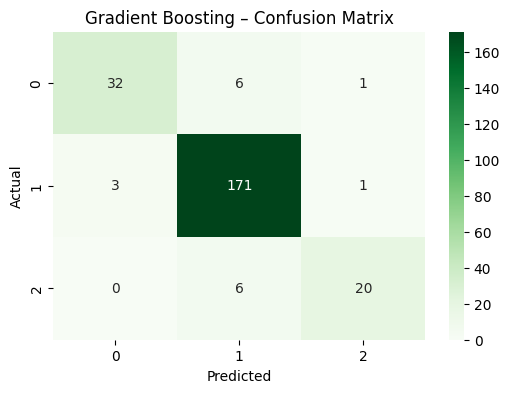

In [45]:
cm_gb = confusion_matrix(y_test, y_pred_gb)

plt.figure(figsize=(6,4))
sns.heatmap(cm_gb, annot=True, fmt='d', cmap='Greens')
plt.title("Gradient Boosting – Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


---
### 9.4 Precision, Recall, F1-Score Comparison

In [46]:
from sklearn.metrics import precision_score, recall_score, f1_score

metrics_df = pd.DataFrame({
    'Model': model_results['Model'],
    'Precision': [
        precision_score(y_test, y_pred_lr, average='weighted'),
        precision_score(y_test, y_pred_dt, average='weighted'),
        precision_score(y_test, y_pred_rf, average='weighted'),
        precision_score(y_test, y_pred_svm, average='weighted'),
        precision_score(y_test, y_pred_knn, average='weighted'),
        precision_score(y_test, y_pred_gb, average='weighted')
    ],
    'Recall': [
        recall_score(y_test, y_pred_lr, average='weighted'),
        recall_score(y_test, y_pred_dt, average='weighted'),
        recall_score(y_test, y_pred_rf, average='weighted'),
        recall_score(y_test, y_pred_svm, average='weighted'),
        recall_score(y_test, y_pred_knn, average='weighted'),
        recall_score(y_test, y_pred_gb, average='weighted')
    ],
    'F1-Score': [
        f1_score(y_test, y_pred_lr, average='weighted'),
        f1_score(y_test, y_pred_dt, average='weighted'),
        f1_score(y_test, y_pred_rf, average='weighted'),
        f1_score(y_test, y_pred_svm, average='weighted'),
        f1_score(y_test, y_pred_knn, average='weighted'),
        f1_score(y_test, y_pred_gb, average='weighted')
    ]
})

metrics_df


,Model,Precision,Recall,F1-Score
0,Logistic Regression,0.815193,0.825000,0.814224
1,Decision Tree,0.895288,0.895833,0.895300
2,Random Forest,0.934059,0.933333,0.931184
3,SVM,0.840688,0.833333,0.812741
4,KNN,0.699114,0.737500,0.686920
5,Gradient Boosting,0.928409,0.929167,0.927397


---
### 9.5 F1-Score Comparison Plot

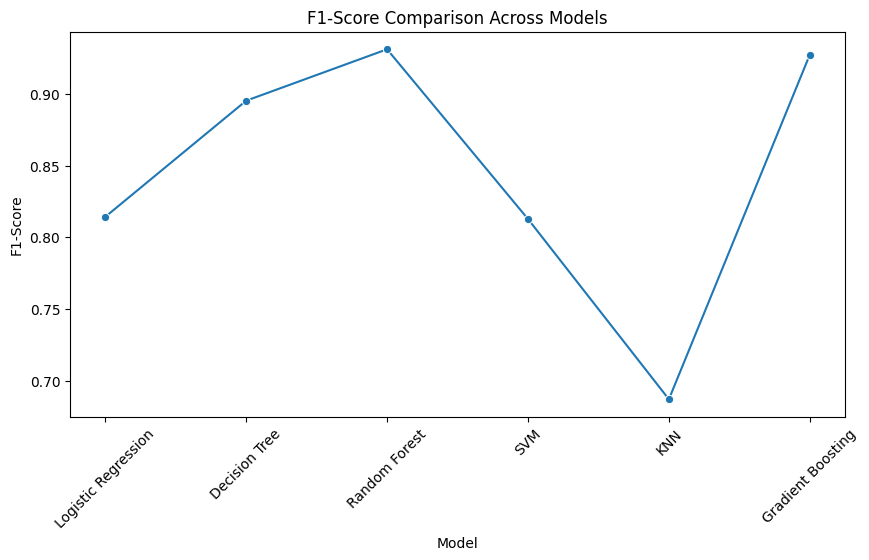

In [47]:
plt.figure(figsize=(10,5))
sns.lineplot(
    x='Model',
    y='F1-Score',
    data=metrics_df,
    marker='o'
)
plt.xticks(rotation=45)
plt.title("F1-Score Comparison Across Models")
plt.show()


---
### 9.6 Final Model Justification

Multiple classification models were evaluated, including Logistic Regression, Decision Tree, SVM, KNN, Random Forest, and Gradient Boosting. Ensemble methods demonstrated superior generalization performance. __Random Forest__ achieved the most balanced accuracy, precision, recall, and F1-score, making it the preferred model for deployment in employee performance prediction.

---
### 9.7 Save Model

In [48]:
joblib.dump(rf, "/content/drive/MyDrive/IABAC Project/Model/random_forest_model.pkl")



['/content/drive/MyDrive/IABAC Project/Model/random_forest_model.pkl']

---
## 10. Model Prediction Function (For Hiring Use-Case)

---
### 10.1 Reload the Trained Model

In [49]:
model = joblib.load("/content/drive/MyDrive/IABAC Project/Model/random_forest_model.pkl")
scaler = joblib.load("/content/drive/MyDrive/IABAC Project/Model/scaler.pkl")
x_test = pd.read_csv("/content/drive/MyDrive/IABAC Project/Processed/X_test.csv")
y_test = pd.read_csv("/content/drive/MyDrive/IABAC Project/Processed/y_test.csv").values.ravel()
X = pd.read_csv("/content/drive/MyDrive/IABAC Project/Processed/X.csv")
y = pd.read_csv("/content/drive/MyDrive/IABAC Project/Processed/y.csv").values.ravel()
X_test_scaled = scaler.transform(x_test)


---
### 10.2 Evaluate Reloaded Model (Proof of Correct Saving)

In [50]:
y_pred = model.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.9333333333333333
              precision    recall  f1-score   support

           2       0.94      0.85      0.89        39
           3       0.93      0.98      0.96       175
           4       0.95      0.73      0.83        26

    accuracy                           0.93       240
   macro avg       0.94      0.85      0.89       240
weighted avg       0.93      0.93      0.93       240



---
### 10.3 Reload Feature Names

In [51]:
with open("/content/drive/MyDrive/IABAC Project/Processed/feature_names.txt") as f:
    feature_names = f.read().splitlines()


---
### 10.4 Model Prediction Function

In [56]:
def predict_employee_performance(input_dict):
    """
    input_dict: {feature_name: value}
    """
    input_df = pd.DataFrame([input_dict], columns=feature_names)
    input_scaled = scaler.transform(input_df)
    prediction = model.predict(input_scaled)
    return prediction[0]



---
### 10.5 Predict for a New Employee

In [53]:
new_employee = {
    'Age': 32,
    'EmpDepartment': 3,
    'EmpJobRole': 5,
    'BusinessTravelFrequency': 2,
    'DistanceFromHome': 10,
    'EmpEducationLevel': 3,
    'EmpEnvironmentSatisfaction': 4,
    'EmpHourlyRate': 65,
    'EmpJobInvolvement': 3,
    'EmpJobLevel': 2,
    'EmpJobSatisfaction': 4,
    'NumCompaniesWorked': 2,
    'OverTime': 1,
    'EmpLastSalaryHikePercent': 15,
    'EmpRelationshipSatisfaction': 3,
    'TotalWorkExperienceInYears': 8,
    'TrainingTimesLastYear': 3,
    'EmpWorkLifeBalance': 3,
    'YearsAtCompany': 5,
    'YearsInCurrentRole': 3,
    'YearsSinceLastPromotion': 2,
    'YearsWithCurrManager': 3
}

employee_performance = predict_employee_performance(new_employee)

print("Predicted Employee Performance = ",employee_performance)

Predicted Employee Performance =  3


---
## 11. Feature Importance (Top Factors Affecting Performance)
__1. EmpLastSalaryHikePercent__

__2. EmpEnvironmentSatisfaction__

__3. YearsSinceLastPromotion__

In [54]:
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

feature_importance.head(10)


,Feature,Importance
16,EmpLastSalaryHikePercent,0.218991
9,EmpEnvironmentSatisfaction,0.213092
23,YearsSinceLastPromotion,0.097653
22,ExperienceYearsInCurrentRole,0.040442
5,EmpJobRole,0.039682
4,EmpDepartment,0.037486
10,EmpHourlyRate,0.035015
21,ExperienceYearsAtThisCompany,0.033210
24,YearsWithCurrManager,0.029931
0,Age,0.029914


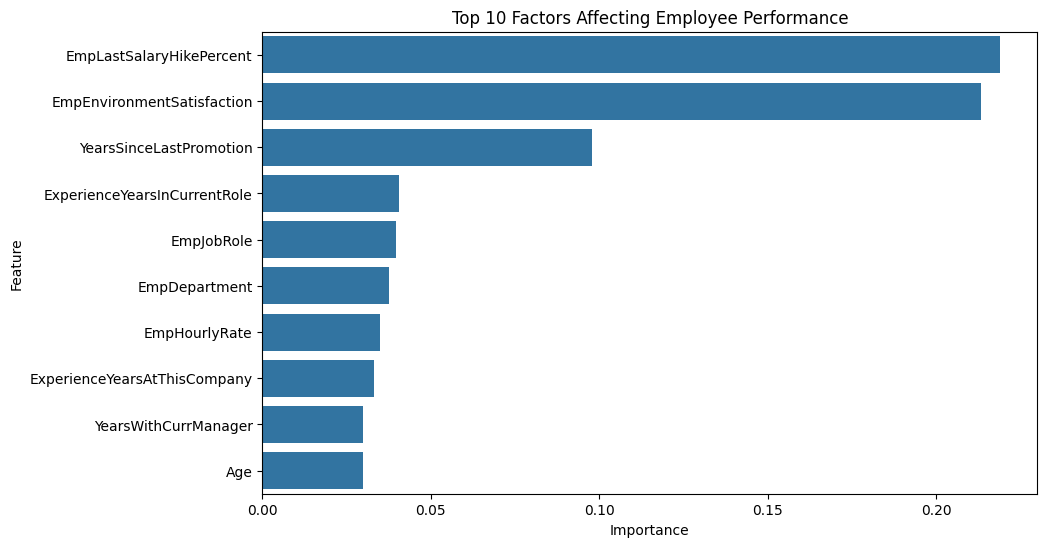

In [55]:
plt.figure(figsize=(10,6))
sns.barplot(
    x='Importance',
    y='Feature',
    data=feature_importance.head(10)
)
plt.title("Top 10 Factors Affecting Employee Performance")
plt.show()


---
## 12. Business Insights & Recommendations

__Key Insights__

- Low performance strongly correlates with:

  - Poor environment satisfaction

  - Delayed promotions

  - Low salary hikes

- Certain departments show consistently lower ratings.

__Recommendations__

1. Improve workplace environment & engagement programs

2. Implement performance-linked salary hikes

3. Reduce promotion stagnation periods

4. Use ML model during hiring to filter high-potential employees

---
## 13. Conclusion

- Successfully identified department-wise performance gaps

- Extracted top 3 factors affecting employee performance

- Built a robust Random Forest model for prediction

- Provided data-driven HR recommendations

---
## 14. Tools & Technologies Used


- Python

- Pandas, NumPy

- Matplotlib, Seaborn

- Scikit-Learn

- Jupyter Notebook